In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#loading our preprocessed dataset
data = pd.read_csv("data_clean_presex.csv")
data

,song,year,artist,genre,lyrics
0,let-s-lurk,2016,67,Hip-Hop,Verse 1:\nStill pulling up on smoke\nSkeng in ...
1,i-can-t-believe,1996,112,Pop,[Chorus]\nI can't believe that love has gone a...
2,it-s-over-now-remix,2000,112,Hip-Hop,What is this?\nNumbers in your pocket\nI remem...
3,anywhere-remix,1999,112,Hip-Hop,"Here we are all alone\nYou and me, privacy\nAn..."
4,come-see-me-remix,1996,112,Hip-Hop,"Baby, you can come see me 'cause I need you he..."
...,...,...,...,...,...
237890,i-had-a-home,2016,bach-mai,Other,I had a place to live\nA warm bed to sleep in\...
237891,daybreak,2016,bach-mai,Other,I know that I am not alone\nAnd if you think t...
237892,feeling-this-low,2016,bach-mai,Other,I heard there was another man another pair of ...
237893,i-wish-i-was,2016,avett-brothers,Country,I wish I was a flame dancing in a candle\nLigh...


In [3]:
# name dataset scraped from the US name dataset, containing names: https://data.world/howarder/gender-by-name
names = pd.read_csv("name_gender.csv")
names

,name,gender,probability
0,Aaban,M,1.0
1,Aabha,F,1.0
2,Aabid,M,1.0
3,Aabriella,F,1.0
4,Aada,F,1.0
...,...,...,...
95021,Zyvon,M,1.0
95022,Zyyanna,F,1.0
95023,Zyyon,M,1.0
95024,Zzyzx,M,1.0


In [4]:
#formatting names like in our main dataset (firstname-lastname)
names['name'] = names['name'].str.lower()                               
for i in range(0,len(names)):                   
    names['name'][i] = names['name'][i].replace(" ", "-")
names.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,name,gender,probability
0,aaban,M,1.0
1,aabha,F,1.0
2,aabid,M,1.0
3,aabriella,F,1.0
4,aada,F,1.0


In [5]:
names_sex = names.drop('probability', axis = 1)            #get rid of variable because we don't need it
names_sex[names_sex['name'] == 'the']   
names_sex[names_sex['name'] == 'dj']
# it's weird/problematic that the is male, same with dj                     

,name,gender
24107,dj,M


In [6]:
#Identification based on first name
data['name'] = data['artist'].str.split('-').str[0]        
#create a new variable "name" which is the first part of every name (splitting by -)
big_merge = pd.merge(data, names_sex, on=['name'], how = 'left')            
# merge two datasets by the name variable so that every adam gets a male, etc
big_merge

,song,year,artist,genre,lyrics,name,gender
0,let-s-lurk,2016,67,Hip-Hop,Verse 1:\nStill pulling up on smoke\nSkeng in ...,67,NaN
1,i-can-t-believe,1996,112,Pop,[Chorus]\nI can't believe that love has gone a...,112,NaN
2,it-s-over-now-remix,2000,112,Hip-Hop,What is this?\nNumbers in your pocket\nI remem...,112,NaN
3,anywhere-remix,1999,112,Hip-Hop,"Here we are all alone\nYou and me, privacy\nAn...",112,NaN
4,come-see-me-remix,1996,112,Hip-Hop,"Baby, you can come see me 'cause I need you he...",112,NaN
...,...,...,...,...,...,...,...
237890,i-had-a-home,2016,bach-mai,Other,I had a place to live\nA warm bed to sleep in\...,bach,M
237891,daybreak,2016,bach-mai,Other,I know that I am not alone\nAnd if you think t...,bach,M
237892,feeling-this-low,2016,bach-mai,Other,I heard there was another man another pair of ...,bach,M
237893,i-wish-i-was,2016,avett-brothers,Country,I wish I was a flame dancing in a candle\nLigh...,avett,M


In [7]:
#dropping those unidentified by names method
clean = big_merge.dropna(axis=0)
clean
#all the matched first names from the namedataset: 131557

,song,year,artist,genre,lyrics,name,gender
6,my-elusive-dreams,1970,bobby-vinton,Pop,"You followed me to Texas,\nYou followed me to ...",bobby,M
7,baby-i-m-yours,1970,bobby-vinton,Pop,Baby I'm yours\nBaby I'm yours\nAnd I'll be yo...,bobby,M
8,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,Raindrops keep falling on my head\nAnd just li...,bobby,M
9,god-only-knows,1970,beach-boys,Rock,I may not always love you\nBut long as there a...,beach,M
10,their-hearts-were-full-of-spring,1970,beach-boys,Rock,There's a story told of a very gentle boy\nAnd...,beach,M
...,...,...,...,...,...,...,...
237889,ruby-lips,2016,bach-mai,Other,I need a second to myself so I can pick back u...,bach,M
237890,i-had-a-home,2016,bach-mai,Other,I had a place to live\nA warm bed to sleep in\...,bach,M
237891,daybreak,2016,bach-mai,Other,I know that I am not alone\nAnd if you think t...,bach,M
237892,feeling-this-low,2016,bach-mai,Other,I heard there was another man another pair of ...,bach,M


In [11]:
data1 = clean[clean['name'] != 'dj'] # removing all the 'dj's 119
data1 = data1[data1['name'] != 'the'] # removing all the 'the's 694
#dj and the are identified as male in the name dataset, which is questionable. so we're going to exclude them from the matches

In [51]:
#data1.to_csv('data1.csv')  #this is what we have to run the double check analysis

In [12]:
thedj = clean[clean['name'] == 'the']                  #create dataframe that only contains artists starting with dj and the
thedj = thedj.append(clean[clean['name'] == 'dj'])

In [13]:
len(thedj)

12155

In [14]:
nans = big_merge[big_merge['gender'].isna()]   
leftovers = pd.concat([thedj, nans])               #merge thes and djs with the nas, so that we will check artists from the other 2 datasets

In [15]:
#let's try to match the artists that had no gender identified from the name dataset
genders = pd.read_csv("singers_gender.csv", encoding = 'latin1')               #read in 2nd dataset, containing singers and their genders
genders['artist'] = genders['artist'].str.lower()                              # format artist names to match our dataset (lowercase, - as space)
genders['artist'][0]= genders['artist'][0].replace(" ", "-")

for i in range(0,len(genders)):
    genders['artist'][i] = genders['artist'][i].replace(" ", "-")

for i in range(0,len(genders)):
    genders['artist'][i] = genders['artist'][i].replace(".", "")


In [16]:
genders

,artist,gender,category
0,12-gauge,male,African-American_male_rappers
1,1987,male,Swedish_male_singers
2,2-chainz,male,African-American_male_rappers
3,2-pistols,male,African-American_male_rappers
4,21-savage,male,African-American_male_rappers
...,...,...,...
23172,øystein-sunde,male,Male_guitarists
23173,øyvind-nypan,male,Male_guitarists
23174,úna-maclochlainn,female,Irish_female_singers
23175,úna-palliser,female,Irish_female_singers


In [16]:
genders['gender'] = genders['gender'].str.replace('male', 'M')               # change male to M and female to F to match other datasets
genders['gender'] = genders['gender'].str.replace('feM', 'F')

In [17]:
leftovers

,song,year,artist,genre,lyrics,name,gender
153,all-right-now,1970,the-free,Rock,There she stood in the street\nSmiling from he...,the,M
154,fire-and-water,1970,the-free,Rock,"Every single day, I got a heartache comin' my ...",the,M
202,the-hunter,1971,the-free,Rock,They call me the hunter\nCause that's my name\...,the,M
417,spanish-harlem,1972,the-crusaders,Other,There is a rose in Spanish Harlem\nA red rose ...,the,M
440,whatcha-see-is-whatcha-get,1972,the-dramatics,R&B,Some people are made of plastic\nAnd you know ...,the,M
...,...,...,...,...,...,...,...
237872,minor-justice,2016,flock-of-dimes,Rock,I saw the life between the two of us\nEach mor...,flock,NaN
237873,the-last-song,2016,above-the-law,Hip-Hop,"experience, so you know it's gonna be some meg...",above,NaN
237874,don-t-care-how-you-feel-about-it,2016,combichrist,Electronic,I got a feeling that is true\nYou know there's...,combichrist,NaN
237875,my-life-my-rules,2016,combichrist,Electronic,Now you know it's changing\nAnd now you're run...,combichrist,NaN


In [18]:
leftovers = leftovers.drop('gender', axis = 1)                               #remove gender column becasue it will be created again

In [20]:
leftovers

,song,year,artist,genre,lyrics,name
153,all-right-now,1970,the-free,Rock,There she stood in the street\nSmiling from he...,the
154,fire-and-water,1970,the-free,Rock,"Every single day, I got a heartache comin' my ...",the
202,the-hunter,1971,the-free,Rock,They call me the hunter\nCause that's my name\...,the
417,spanish-harlem,1972,the-crusaders,Other,There is a rose in Spanish Harlem\nA red rose ...,the
440,whatcha-see-is-whatcha-get,1972,the-dramatics,R&B,Some people are made of plastic\nAnd you know ...,the
...,...,...,...,...,...,...
237872,minor-justice,2016,flock-of-dimes,Rock,I saw the life between the two of us\nEach mor...,flock
237873,the-last-song,2016,above-the-law,Hip-Hop,"experience, so you know it's gonna be some meg...",above
237874,don-t-care-how-you-feel-about-it,2016,combichrist,Electronic,I got a feeling that is true\nYou know there's...,combichrist
237875,my-life-my-rules,2016,combichrist,Electronic,Now you know it's changing\nAnd now you're run...,combichrist


In [19]:
genders = genders.drop('category', axis = 1)                                 # remove category column because we don't care

In [22]:
genders

,artist,gender
0,12-gauge,M
1,1987,M
2,2-chainz,M
3,2-pistols,M
4,21-savage,M
...,...,...
23172,øystein-sunde,M
23173,øyvind-nypan,M
23174,úna-maclochlainn,F
23175,úna-palliser,F


In [23]:
leftovers

,song,year,artist,genre,lyrics,name
153,all-right-now,1970,the-free,Rock,There she stood in the street\nSmiling from he...,the
154,fire-and-water,1970,the-free,Rock,"Every single day, I got a heartache comin' my ...",the
202,the-hunter,1971,the-free,Rock,They call me the hunter\nCause that's my name\...,the
417,spanish-harlem,1972,the-crusaders,Other,There is a rose in Spanish Harlem\nA red rose ...,the
440,whatcha-see-is-whatcha-get,1972,the-dramatics,R&B,Some people are made of plastic\nAnd you know ...,the
...,...,...,...,...,...,...
237872,minor-justice,2016,flock-of-dimes,Rock,I saw the life between the two of us\nEach mor...,flock
237873,the-last-song,2016,above-the-law,Hip-Hop,"experience, so you know it's gonna be some meg...",above
237874,don-t-care-how-you-feel-about-it,2016,combichrist,Electronic,I got a feeling that is true\nYou know there's...,combichrist
237875,my-life-my-rules,2016,combichrist,Electronic,Now you know it's changing\nAnd now you're run...,combichrist


In [20]:
nans_extra = pd.merge(leftovers, genders, on=['artist'], how = 'left')   #merging singers gender and nans

In [25]:
nans_extra

,song,year,artist,genre,lyrics,name,gender
0,all-right-now,1970,the-free,Rock,There she stood in the street\nSmiling from he...,the,NaN
1,fire-and-water,1970,the-free,Rock,"Every single day, I got a heartache comin' my ...",the,NaN
2,the-hunter,1971,the-free,Rock,They call me the hunter\nCause that's my name\...,the,NaN
3,spanish-harlem,1972,the-crusaders,Other,There is a rose in Spanish Harlem\nA red rose ...,the,NaN
4,whatcha-see-is-whatcha-get,1972,the-dramatics,R&B,Some people are made of plastic\nAnd you know ...,the,NaN
...,...,...,...,...,...,...,...
118488,minor-justice,2016,flock-of-dimes,Rock,I saw the life between the two of us\nEach mor...,flock,NaN
118489,the-last-song,2016,above-the-law,Hip-Hop,"experience, so you know it's gonna be some meg...",above,NaN
118490,don-t-care-how-you-feel-about-it,2016,combichrist,Electronic,I got a feeling that is true\nYou know there's...,combichrist,NaN
118491,my-life-my-rules,2016,combichrist,Electronic,Now you know it's changing\nAnd now you're run...,combichrist,NaN


In [21]:
nans_extra1 = nans_extra.dropna()        #get the matches 

In [28]:
len(nans_extra1.artist.unique()) #we identified 273 the gender of more artists

273

In [22]:
data = pd.concat([data1, nans_extra1]) #### data1: genders identified from names dataset-dj and the, which were put in the nans_extra, together with nans, then 
                                      # we checked if there is some gender to be identified from the singers_gender dataset in the nans_extra (nans+dj+the)
                                    # we found 255, merged it with data1

In [30]:
data

,song,year,artist,genre,lyrics,name,gender
6,my-elusive-dreams,1970,bobby-vinton,Pop,"You followed me to Texas,\nYou followed me to ...",bobby,M
7,baby-i-m-yours,1970,bobby-vinton,Pop,Baby I'm yours\nBaby I'm yours\nAnd I'll be yo...,bobby,M
8,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,Raindrops keep falling on my head\nAnd just li...,bobby,M
9,god-only-knows,1970,beach-boys,Rock,I may not always love you\nBut long as there a...,beach,M
10,their-hearts-were-full-of-spring,1970,beach-boys,Rock,There's a story told of a very gentle boy\nAnd...,beach,M
...,...,...,...,...,...,...,...
118312,just-lose-it-explicit,2016,eminem,Hip-Hop,OK\nGuess who's back\nBack again\nShady's back...,eminem,M
118313,bitch-please-iii,2016,eminem,Hip-Hop,"Yeah what-up Detroit?\nNu-uh, nu-uh nuh-no he ...",eminem,M
118375,mad,2016,fiend,Metal,"Fords in Passat\nOne, not\nWearin socks,\nFlip...",fiend,M
118421,wrong-one,2016,grafh,Hip-Hop,"[Sample]\n""And he smiles""\n[Intro: Grafh]\n[?]...",grafh,M


In [23]:
billboard = pd.read_csv("artistDf_billboard.csv")                     #same as before with a third dataset. we check if the artists                                                                       
billboard['Artist'] = billboard['Artist'].str.lower()                  # that were not found in the other datasets are here
for i in range(0,len(billboard)):
    billboard['Artist'][i] = billboard['Artist'][i].replace(" ", "-")
billboard.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,ed-sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,justin-bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,jonas-brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,chris-brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo


In [24]:
billboard = billboard.drop(['Followers','Genres', 'NumAlbums', 'YearFirstAlbum', 'Group.Solo', 'X'], axis = 1)

In [33]:
billboard

,Artist,Gender
0,ed-sheeran,M
1,justin-bieber,M
2,jonas-brothers,M
3,drake,M
4,chris-brown,M
...,...,...
1030,dwight-yoakam,M
1031,jordan-knight,M
1032,lila-mccann,F
1033,everlast,M


In [25]:
billboard.rename(columns = {'Artist':'artist'}, inplace = True)
billboard.rename(columns = {'Gender':'gender'}, inplace = True)

In [35]:
billboard

,artist,gender
0,ed-sheeran,M
1,justin-bieber,M
2,jonas-brothers,M
3,drake,M
4,chris-brown,M
...,...,...
1030,dwight-yoakam,M
1031,jordan-knight,M
1032,lila-mccann,F
1033,everlast,M


In [36]:
nans_extra

,song,year,artist,genre,lyrics,name,gender
0,all-right-now,1970,the-free,Rock,There she stood in the street\nSmiling from he...,the,NaN
1,fire-and-water,1970,the-free,Rock,"Every single day, I got a heartache comin' my ...",the,NaN
2,the-hunter,1971,the-free,Rock,They call me the hunter\nCause that's my name\...,the,NaN
3,spanish-harlem,1972,the-crusaders,Other,There is a rose in Spanish Harlem\nA red rose ...,the,NaN
4,whatcha-see-is-whatcha-get,1972,the-dramatics,R&B,Some people are made of plastic\nAnd you know ...,the,NaN
...,...,...,...,...,...,...,...
118488,minor-justice,2016,flock-of-dimes,Rock,I saw the life between the two of us\nEach mor...,flock,NaN
118489,the-last-song,2016,above-the-law,Hip-Hop,"experience, so you know it's gonna be some meg...",above,NaN
118490,don-t-care-how-you-feel-about-it,2016,combichrist,Electronic,I got a feeling that is true\nYou know there's...,combichrist,NaN
118491,my-life-my-rules,2016,combichrist,Electronic,Now you know it's changing\nAnd now you're run...,combichrist,NaN


In [26]:
nans_extra = nans_extra.drop('gender', axis = 1)

In [40]:
nans_extra

,song,year,artist,genre,lyrics,name
0,all-right-now,1970,the-free,Rock,There she stood in the street\nSmiling from he...,the
1,fire-and-water,1970,the-free,Rock,"Every single day, I got a heartache comin' my ...",the
2,the-hunter,1971,the-free,Rock,They call me the hunter\nCause that's my name\...,the
3,spanish-harlem,1972,the-crusaders,Other,There is a rose in Spanish Harlem\nA red rose ...,the
4,whatcha-see-is-whatcha-get,1972,the-dramatics,R&B,Some people are made of plastic\nAnd you know ...,the
...,...,...,...,...,...,...
118488,minor-justice,2016,flock-of-dimes,Rock,I saw the life between the two of us\nEach mor...,flock
118489,the-last-song,2016,above-the-law,Hip-Hop,"experience, so you know it's gonna be some meg...",above
118490,don-t-care-how-you-feel-about-it,2016,combichrist,Electronic,I got a feeling that is true\nYou know there's...,combichrist
118491,my-life-my-rules,2016,combichrist,Electronic,Now you know it's changing\nAnd now you're run...,combichrist


In [41]:
billboard

,artist,gender
0,ed-sheeran,M
1,justin-bieber,M
2,jonas-brothers,M
3,drake,M
4,chris-brown,M
...,...,...
1030,dwight-yoakam,M
1031,jordan-knight,M
1032,lila-mccann,F
1033,everlast,M


In [27]:
nans_extra2 = pd.merge(nans_extra, billboard, on=['artist'], how = 'left')

In [43]:
nans_extra2

,song,year,artist,genre,lyrics,name,gender
0,all-right-now,1970,the-free,Rock,There she stood in the street\nSmiling from he...,the,NaN
1,fire-and-water,1970,the-free,Rock,"Every single day, I got a heartache comin' my ...",the,NaN
2,the-hunter,1971,the-free,Rock,They call me the hunter\nCause that's my name\...,the,NaN
3,spanish-harlem,1972,the-crusaders,Other,There is a rose in Spanish Harlem\nA red rose ...,the,NaN
4,whatcha-see-is-whatcha-get,1972,the-dramatics,R&B,Some people are made of plastic\nAnd you know ...,the,NaN
...,...,...,...,...,...,...,...
118488,minor-justice,2016,flock-of-dimes,Rock,I saw the life between the two of us\nEach mor...,flock,NaN
118489,the-last-song,2016,above-the-law,Hip-Hop,"experience, so you know it's gonna be some meg...",above,NaN
118490,don-t-care-how-you-feel-about-it,2016,combichrist,Electronic,I got a feeling that is true\nYou know there's...,combichrist,NaN
118491,my-life-my-rules,2016,combichrist,Electronic,Now you know it's changing\nAnd now you're run...,combichrist,NaN


In [28]:
nans_extra3 = nans_extra2.dropna()

In [45]:
nans_extra3

,song,year,artist,genre,lyrics,name,gender
671,leavin-trunk,2002,the-black-keys,Rock,Goin' upstairs to pack my leavin' trunk\nI ain...,the,M
672,countdown,2002,the-black-keys,Rock,"Well it's one, two, three, four, five, six, se...",the,M
673,i-ll-be-your-man,2002,the-black-keys,Rock,"Need a new love, yeah I'm ready\nWant my time,...",the,M
674,do-the-rump,2002,the-black-keys,Rock,Hey now baby - Let's do the rump\nYeah darling...,the,M
676,busted,2002,the-black-keys,Rock,"Well, I'm busted\nYes, I'm busted\nBut my hear...",the,M
...,...,...,...,...,...,...,...
118368,a-little-less-sixteen-candles-a-little-more,2016,fall-out-boy,Rock,"I confess, I'm messed up\nDropping ""I'm sorry'...",fall,M
118418,heart-beat-here,2016,dashboard-confessional,Rock,come on home lay yourself here\nyou could slee...,dashboard,M
118447,3-minute-rule-explicit,2016,beastie-boys,Hip-Hop,"I stay up all night, I go to sleep watching Dr...",beastie,M
118448,car-thief-explicit,2016,beastie-boys,Hip-Hop,Some static started in the pool hall\nHit a mo...,beastie,M


In [46]:
len(nans_extra3.artist.unique()) #113 more genders!!!!

113

In [29]:
data = pd.concat([data, nans_extra3]) #### data1: genders identified from names dataset-dj and the, which were put in the nans_extra, together with nans, then 


In [49]:
data[0:40]

,song,year,artist,genre,lyrics,name,gender
6,my-elusive-dreams,1970,bobby-vinton,Pop,"You followed me to Texas,\nYou followed me to ...",bobby,M
7,baby-i-m-yours,1970,bobby-vinton,Pop,Baby I'm yours\nBaby I'm yours\nAnd I'll be yo...,bobby,M
8,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,Raindrops keep falling on my head\nAnd just li...,bobby,M
9,god-only-knows,1970,beach-boys,Rock,I may not always love you\nBut long as there a...,beach,M
10,their-hearts-were-full-of-spring,1970,beach-boys,Rock,There's a story told of a very gentle boy\nAnd...,beach,M
11,wouldn-t-it-be-nice,1970,beach-boys,Rock,Wouldn't it be nice if we were older?\nThen we...,beach,M
12,wake-the-world,1970,beach-boys,Rock,One by one the stars appear\nThe light of the ...,beach,M
13,sloop-john-b,1970,beach-boys,Rock,We come on the sloop john be\nMy grandfather a...,beach,M
14,darlin,1970,beach-boys,Rock,Ohh darlin'\nMy darlin' you're so fine\nOhhhh-...,beach,M
15,do-it-again,1970,beach-boys,Rock,It's automatic when I\nTalk with old friends\n...,beach,M


In [187]:
#clean.to_csv('clean.csv')   #clean contains matches from first dataset
#data.to_csv('data.csv')

In [30]:
artists = data[['artist', 'gender']]

In [206]:
artists

,artist,gender
6,fleetwood-mac,M
7,bobby-vinton,M
8,bobby-vinton,M
9,bobby-vinton,M
10,beach-boys,M
...,...,...
118377,fall-out-boy,M
118427,dashboard-confessional,M
118456,beastie-boys,M
118457,beastie-boys,M


In [31]:
artists = artists.drop_duplicates()
artists.gender.describe()

count     6675
unique       2
top          M
freq      4392
Name: gender, dtype: object

In [214]:
data.year.describe()

count    141084.000000
mean       2007.654716
std           5.570379
min        1968.000000
25%        2006.000000
50%        2007.000000
75%        2011.000000
max        2016.000000
Name: year, dtype: float64

In [36]:
years = []
ns = []
for i in data.year.unique():
    year = i
    n = len(data[data['year'] == i])
    ns.append(n)
    years.append(year)

result = {
'year':pd.Series(years),
'n_songs':pd.Series(ns)}
    
count_song_year = pd.DataFrame(result)


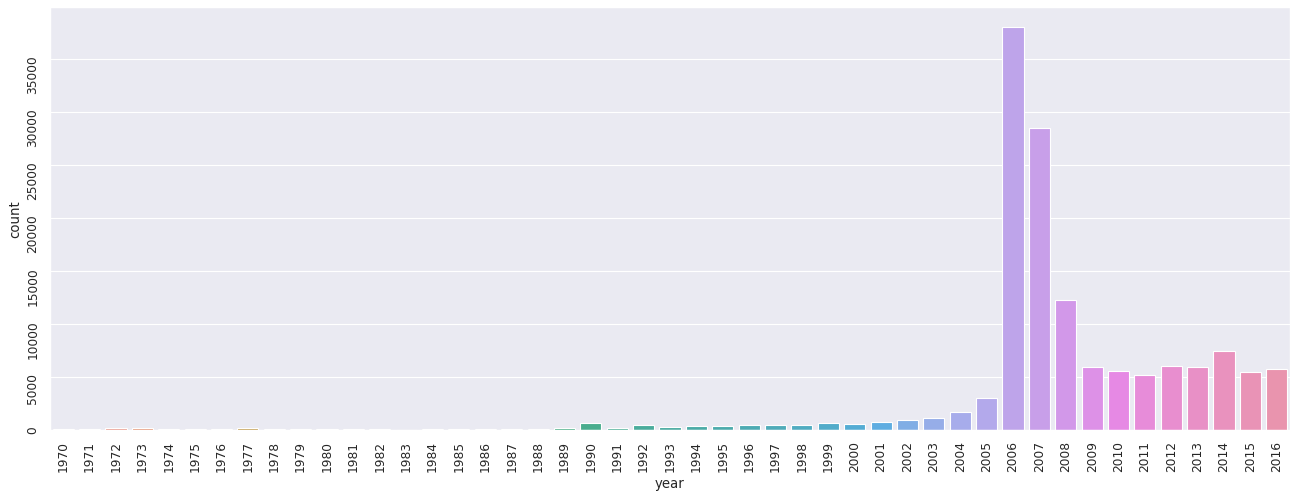

In [43]:
# importing the required library
plt.figure( figsize=(20,7), dpi= 80)
#sns.set(rc={'figure.figsize':(20.7,10.27)})
# count plot on single categorical variable
sns.countplot(x='year', data=data)
#sns.countplot(x ='year', data = data)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
#plt.xticks(rotation=45)

# Show the plot
plt.show()



In [257]:
len(clean.artist.unique())

7135

In [3]:
new_data = pd.read_csv('new_data.csv')
new_data

,Unnamed: 0,song,year,artist,genre,lyrics,gender
0,1,my-elusive-dreams,1970,bobby-vinton,Pop,"You followed me to Texas,\nYou followed me to ...",M
1,2,baby-i-m-yours,1970,bobby-vinton,Pop,Baby I'm yours\nBaby I'm yours\nAnd I'll be yo...,M
2,3,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,Raindrops keep falling on my head\nAnd just li...,M
3,4,god-only-knows,1970,beach-boys,Rock,I may not always love you\nBut long as there a...,M
4,5,their-hearts-were-full-of-spring,1970,beach-boys,Rock,There's a story told of a very gentle boy\nAnd...,M
...,...,...,...,...,...,...,...
119361,5798,country-ain-t-never-been-pretty,2015,cam,Other,Her high heels on the red carpet\nHer perfect ...,F
119362,5799,runaway-train,2015,cam,Other,I always knew that you were hiding something f...,F
119363,5800,want-it-all,2015,cam,Other,"Been a-sittin' 'round a coward, broken all tha...",F
119364,5829,pocket-full-of-keys,2015,dale-ann-bradley,Country,"He has one that locks the office,\nAnd there's...",F


In [4]:
new_data['gender'].describe()
#90381 datapoints for males, 36914 for females (about 2,5x more data for males)

count     119366
unique         2
top            M
freq       86319
Name: gender, dtype: object

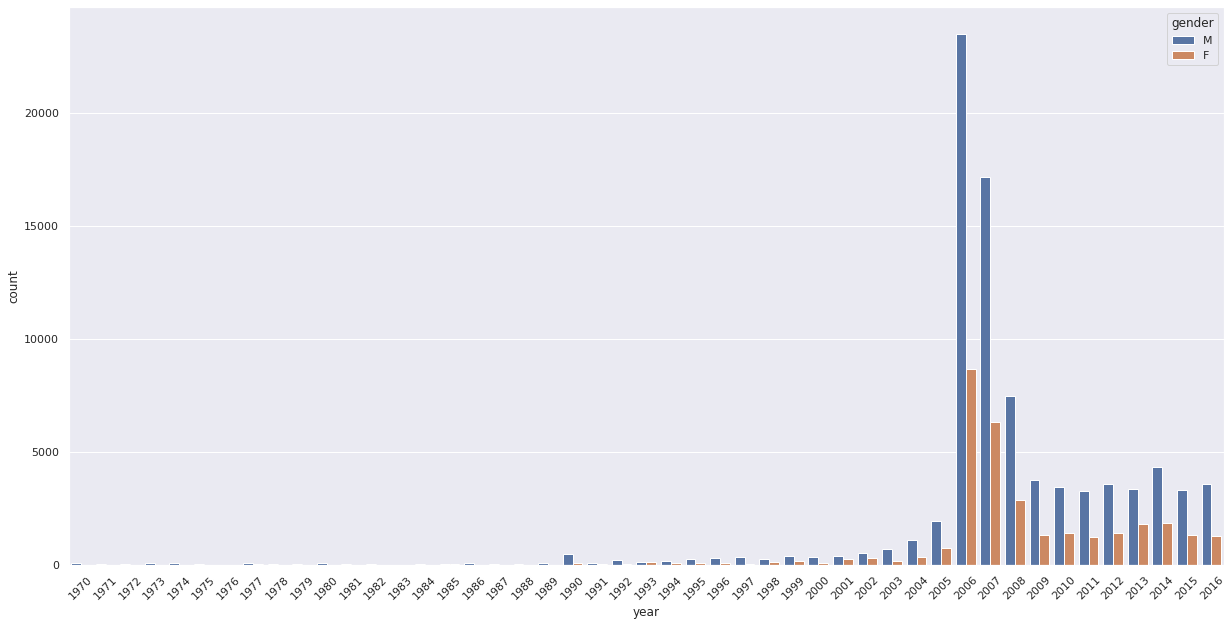

In [5]:
#plotting by year and gender
sns.set(rc={'figure.figsize':(20.7,10.27)})
# count plot on single categorical variable
sns.countplot(x ='year', hue="gender", data = new_data)
plt.xticks(rotation=45)
# Show the plot
plt.show()

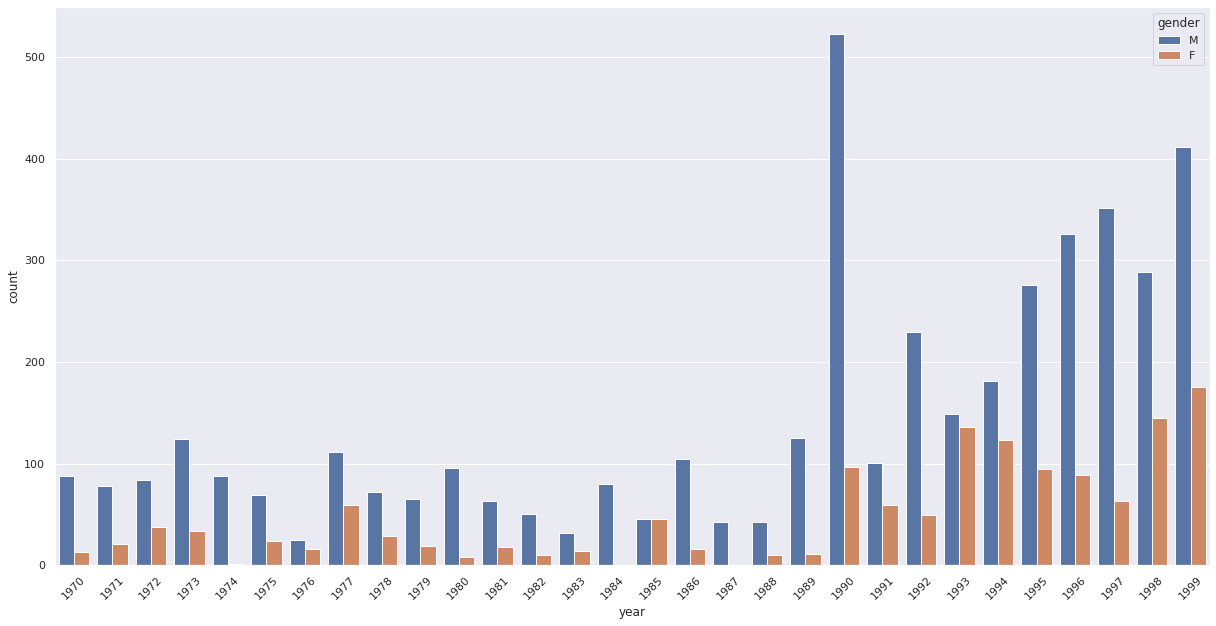

In [6]:
#plot between 1970-2000 with gender distribution
sns.set(rc={'figure.figsize':(20.7,10.27)})
# count plot on single categorical variable
sns.countplot(x ='year', hue="gender", data = new_data[new_data['year']<2000])
plt.xticks(rotation=45)
# Show the plot
plt.show()

##1974 and 1984: no data for females??

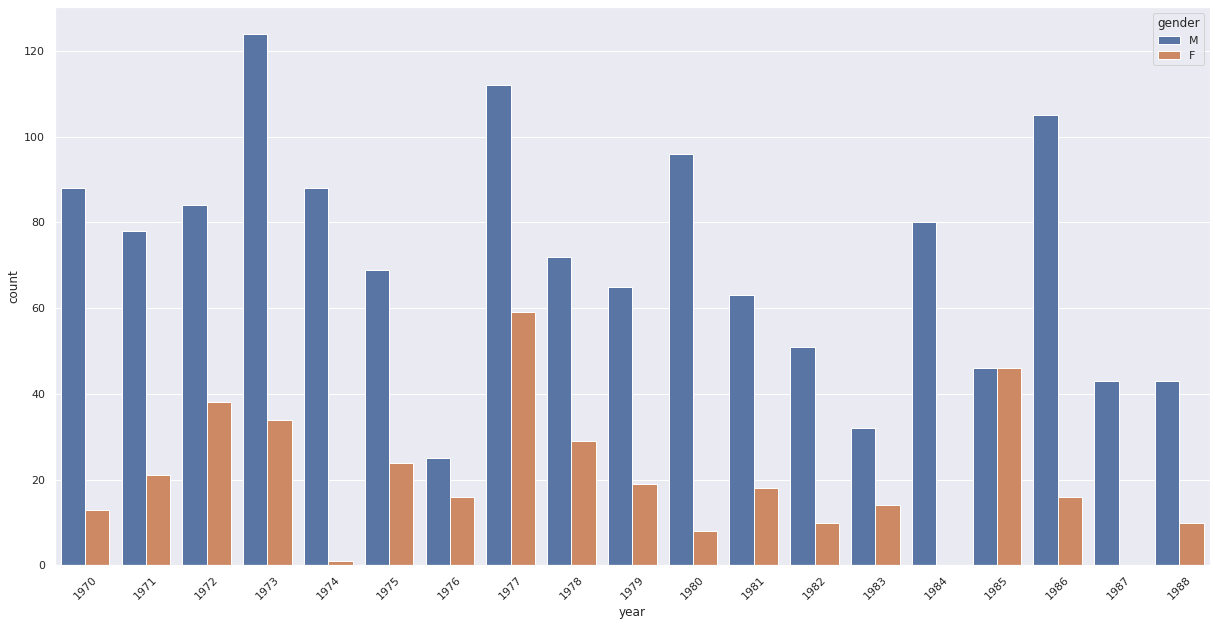

In [13]:
#plot between 1970-1989 with gender distribution
sns.set(rc={'figure.figsize':(20.7,10.27)})
# count plot on single categorical variable
sns.countplot(x ='year', hue="gender", data = new_data[new_data['year']<1989])
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [11]:
y1987 = new_data[new_data['year']== 1987]
y1987['gender']=='F' #no songs for females in year 1987

1609    False
1610    False
1611    False
1612    False
1613    False
1614    False
1615    False
1616    False
1617    False
1618    False
1619    False
1620    False
1621    False
1622    False
1623    False
1624    False
1625    False
1626    False
1627    False
1628    False
1629    False
1630    False
1631    False
1632    False
1633    False
1634    False
1635    False
1636    False
1637    False
1638    False
1639    False
1640    False
1641    False
1642    False
1643    False
1644    False
1645    False
1646    False
1647    False
1648    False
1649    False
1650    False
1651    False
Name: gender, dtype: bool

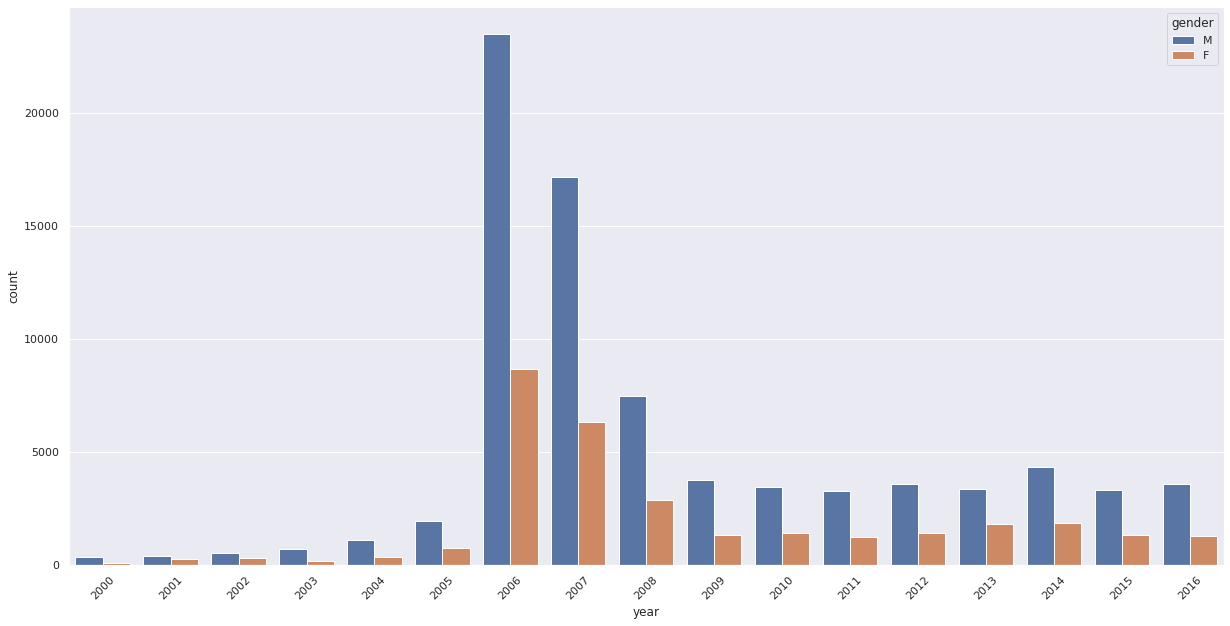

In [14]:
#plot between 2000-2016 with gender distribution
sns.set(rc={'figure.figsize':(20.7,10.27)})
# count plot on single categorical variable
sns.countplot(x ='year', hue="gender", data = new_data[new_data['year']>1999])
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [16]:
#plotting number of artists per sex over year
sns.set(rc={'figure.figsize':(20.7,10.27)})
# count plot on single categorical variable
sns.countplot(x ='year', hue="gender", data = new_data[new_data['artist']])
plt.xticks(rotation=45)

# Show the plot
plt.show()

KeyError: "None of [Index(['bobby-vinton', 'bobby-vinton', 'bobby-vinton', 'beach-boys',\n       'beach-boys', 'beach-boys', 'beach-boys', 'beach-boys', 'beach-boys',\n       'beach-boys',\n       ...\n       'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam',\n       'dale-ann-bradley', 'flame'],\n      dtype='object', length=119366)] are in the [columns]"